<a href="https://colab.research.google.com/github/Carmen-N/Curso-EDA-/blob/master/Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Churn Rate **

qué es ?

El ***churn rate***, o tasa de abandono, es el porcentaje de clientes o abonados que dejan de utilizar los servicios ofrecidos por una empresa durante un periodo de tiempo.
Aunque es un término asociado al email marketing, también se utiliza en otros sectores para referirse a la pérdida de clientes.

Por ejemplo, si tenemos 100.000 suscriptores a nuestro boletín semanal y hemos recibido solicitudes de baja de 2.000 de ellos, dividimos 2.000 / 100.000 para obtener una tasa de cancelación del 2%.

Los clientes más interesados son los de telecomunicaciones, ya que su modelo de negocio es una economia de escala. Es decir, una economía que depende fuertemente de una gran cantidad de usuarios.

**Investigación de negocio**


*  Entendimiento del Negocio 
*   Entendimiento de los Datos


*  Preparación de los Datos 
*  Modelado


*  Evaluación
*  Despliegue








***Entendimiento del Negocio***

Por lo general se utiliza un cuestionario, donde se preguntan cosas como:


*   ¿Cómo se genera valor en el negocio?
*   ¿Cuál es la cadena de valor del negocio?


*   ¿Qué datos se recaban en el negocio?






Esto se puede focalizar a las diverentes unidades de negocio:


*   Recursos Humanos

*   Operaciones
*   Ventas


*   Legal



**Entendimiento de los Datos**

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as plt
import seaborn as sns
sns.set(style="white")
from google.colab import files
import io 

In [60]:
data = files.upload()

Saving Telco_Churn.csv to Telco_Churn (1).csv


In [63]:
df = pd.read_csv(io.StringIO(data['Telco_Churn.csv'].decode('utf-8')))


In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vamos a analizar si a la tabla le falta algún valor

In [66]:
df[df['TotalCharges'] == " "] #Esta instrucción analiza si le falta algun valor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Con el siguiente código, colocamos los valores que faltan

In [67]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32') ##Esta instrucción se encarga de pasar todos los valores a 0

In [68]:
print ("Renglones     : " ,df.shape[0])
print ("Columnas  : " ,df.shape[1])
print ("\nCaracterísticas : \n" ,df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())

Renglones     :  7043
Columnas  :  21

Características : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Valores faltantes :   0


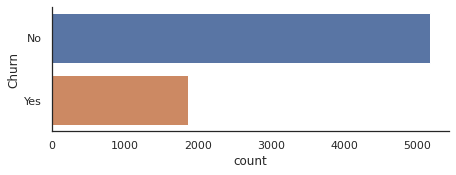

In [69]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

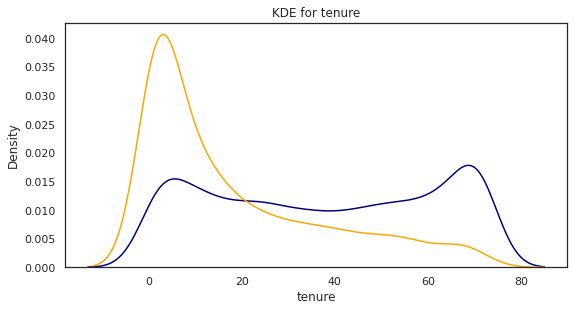

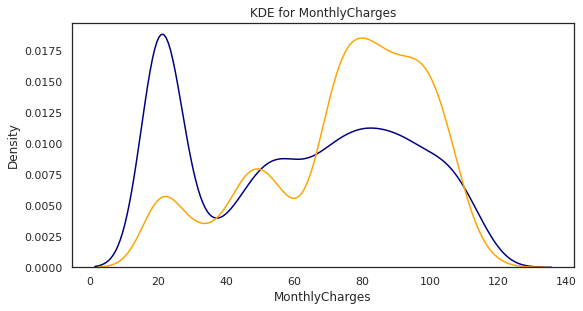

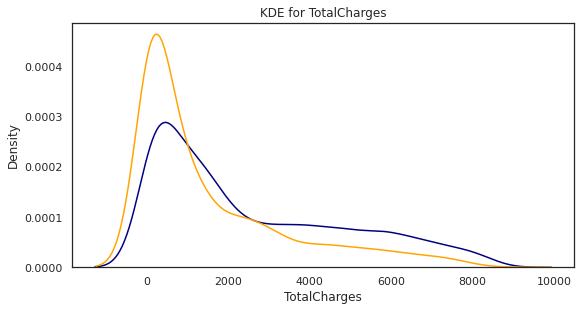

In [70]:
def kdeplot(feature):
    '''
    Esta función grafica la probabilidad de que haya Churn, dad la variable de entrada
    Ustedes la pueden modificar para algún otra variable que les interese
    '''
    plt.figure(figsize=(9, 4.5))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')

    
    
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

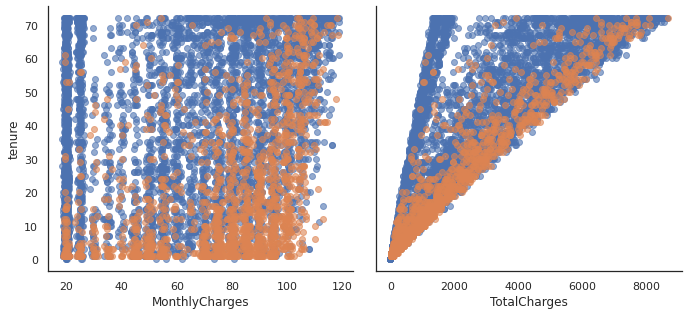

In [71]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

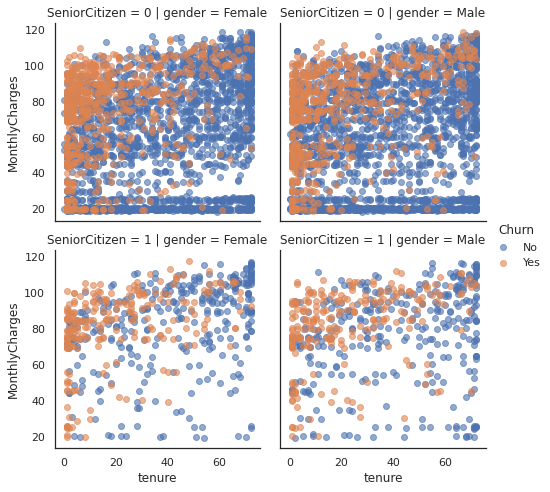

In [72]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

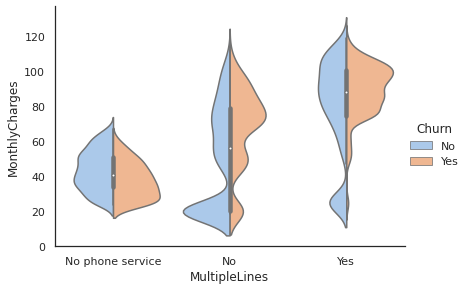

In [73]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

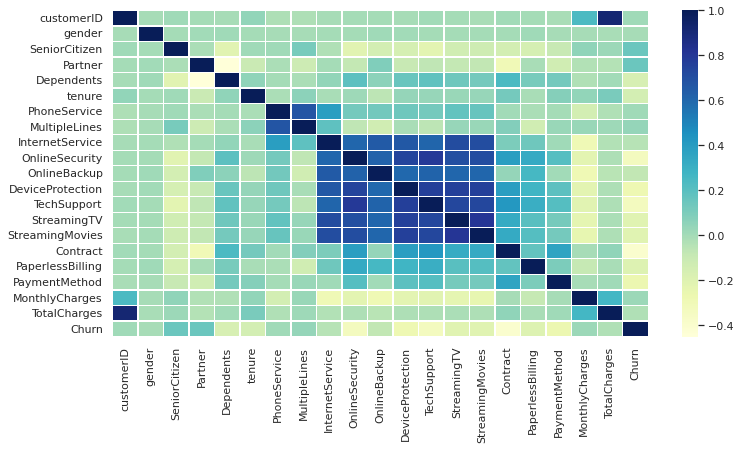

In [74]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

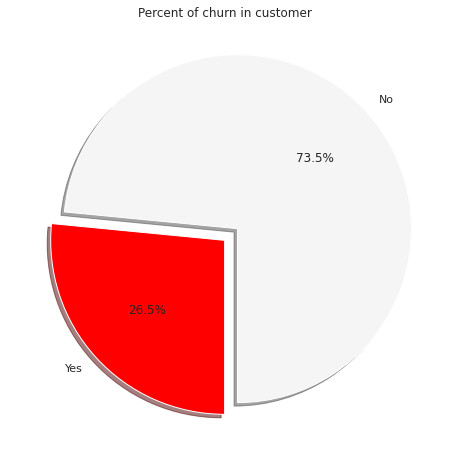

In [75]:
# Data to plot
from pylab import rcParams
labels =df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()